In [1]:
# Linear Regression, RF, XGB

In [ ]:
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
#from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor


In [3]:
#view data / explore
SPY = yf.Ticker("^GSPC")
SPY_data = SPY.history(period="10y", interval="1d") #use 10 years of train data and 1 year of test

print(SPY_data.head())

                                  Open         High          Low        Close  \
Date                                                                            
2015-04-20 00:00:00-04:00  2084.110107  2103.939941  2084.110107  2100.399902   
2015-04-21 00:00:00-04:00  2102.820068  2109.639893  2094.379883  2097.290039   
2015-04-22 00:00:00-04:00  2098.270020  2109.979980  2091.050049  2107.959961   
2015-04-23 00:00:00-04:00  2107.209961  2120.489990  2103.189941  2112.929932   
2015-04-24 00:00:00-04:00  2112.800049  2120.919922  2112.800049  2117.689941   

                               Volume  Dividends  Stock Splits  
Date                                                            
2015-04-20 00:00:00-04:00  3000160000        0.0           0.0  
2015-04-21 00:00:00-04:00  3243410000        0.0           0.0  
2015-04-22 00:00:00-04:00  3348480000        0.0           0.0  
2015-04-23 00:00:00-04:00  3636670000        0.0           0.0  
2015-04-24 00:00:00-04:00  3375780000     

In [4]:
dow = yf.Ticker("^DJI")
dow_data = dow.history(period="10y", interval="1d")

print(dow_data.head())

                                   Open          High           Low  \
Date                                                                  
2015-04-20 00:00:00-04:00  17841.179688  18092.220703  17841.179688   
2015-04-21 00:00:00-04:00  18034.230469  18109.699219  17929.630859   
2015-04-22 00:00:00-04:00  17950.820312  18056.019531  17887.759766   
2015-04-23 00:00:00-04:00  18031.900391  18133.029297  17966.769531   
2015-04-24 00:00:00-04:00  18056.419922  18108.869141  18009.080078   

                                  Close     Volume  Dividends  Stock Splits  
Date                                                                         
2015-04-20 00:00:00-04:00  18034.929688  103160000        0.0           0.0  
2015-04-21 00:00:00-04:00  17949.589844   95180000        0.0           0.0  
2015-04-22 00:00:00-04:00  18038.269531   91260000        0.0           0.0  
2015-04-23 00:00:00-04:00  18058.689453  100240000        0.0           0.0  
2015-04-24 00:00:00-04:00  18080.1

In [5]:
nasdaq = yf.Ticker("^IXIC")
nasdaq_data = nasdaq.history(period="10y", interval="1d")

print(nasdaq_data.head())

                                  Open         High          Low        Close  \
Date                                                                            
2015-04-20 00:00:00-04:00  4958.069824  5000.200195  4952.680176  4994.600098   
2015-04-21 00:00:00-04:00  5023.959961  5028.220215  5009.509766  5014.100098   
2015-04-22 00:00:00-04:00  5026.569824  5040.649902  4992.620117  5035.169922   
2015-04-23 00:00:00-04:00  5020.220215  5073.089844  5019.290039  5056.060059   
2015-04-24 00:00:00-04:00  5096.339844  5100.370117  5081.209961  5092.080078   

                               Volume  Dividends  Stock Splits  
Date                                                            
2015-04-20 00:00:00-04:00  1646340000        0.0           0.0  
2015-04-21 00:00:00-04:00  1721260000        0.0           0.0  
2015-04-22 00:00:00-04:00  1696380000        0.0           0.0  
2015-04-23 00:00:00-04:00  1858620000        0.0           0.0  
2015-04-24 00:00:00-04:00  1895150000     

In [6]:
def preprocessing(df, column = 'Close', sequence_length = 30, test_size = 0.1): #sequence length is # of days in window
    df = df.copy()
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(df[[column]])
    
    X,y = [],[]
    for i in range(sequence_length, len(scaled_data)):
        X.append(scaled_data[i-sequence_length:i, 0])
        y.append(scaled_data[i, 0])

    X,y = np.array(X), np.array(y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=False)

    return X_train, X_test, y_train, y_test, scaler


In [7]:
X_train_spy, X_test_spy, y_train_spy, y_test_spy, scaler_spy = preprocessing(SPY_data)
X_train_dow, X_test_dow, y_train_dow, y_test_dow, scaler_dow = preprocessing(dow_data)
X_train_nasdaq, X_test_nasdaq, y_train_nasdaq, y_test_nasdaq, scaler_nasdaq = preprocessing(nasdaq_data)


In [8]:
def LR(X_train, X_test, y_train, y_test, scaler, label=''):
    # Train model
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    lr_pred = lr_model.predict(X_test)

    # Inverse transform to get original scaling (undo 0-1 scaling)
    lr_pred_actual = scaler.inverse_transform(lr_pred.reshape(-1, 1))
    y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Evaluation metrics
    rmse = np.sqrt(mean_squared_error(y_test_actual, lr_pred_actual))
    mae = mean_absolute_error(y_test_actual, lr_pred_actual)
    r2 = r2_score(y_test_actual, lr_pred_actual)

    print(f"Linear Regression Metrics ({label}):")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE:  {mae:.4f}")
    print(f"R² Score: {r2:.4f}")
    
    return lr_model, lr_pred_actual, y_test_actual, {'rmse': rmse, 'mae': mae, 'r2': r2}

In [9]:
def xgboost(X_train, X_test, y_train, y_test, scaler, label=''):
    model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    pred_actual = scaler.inverse_transform(pred.reshape(-1, 1))
    y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

    rmse = np.sqrt(mean_squared_error(y_test_actual, pred_actual))
    mae = mean_absolute_error(y_test_actual, pred_actual)
    r2 = r2_score(y_test_actual, pred_actual)

    print(f"XGBoost Metrics ({label}):")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE:  {mae:.4f}")
    print(f"R² Score: {r2:.4f}")

    return model, pred_actual, y_test_actual, {'rmse': rmse, 'mae': mae, 'r2': r2}

In [10]:
def RF(X_train, X_test, y_train, y_test, scaler, label=''):
    model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    pred_actual = scaler.inverse_transform(pred.reshape(-1, 1))
    y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

    rmse = np.sqrt(mean_squared_error(y_test_actual, pred_actual))
    mae = mean_absolute_error(y_test_actual, pred_actual)
    r2 = r2_score(y_test_actual, pred_actual)

    print(f"Random Forest Metrics ({label}):")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE:  {mae:.4f}")
    print(f"R² Score: {r2:.4f}")

    return model, pred_actual, y_test_actual, {'rmse': rmse, 'mae': mae, 'r2': r2}

In [11]:
def plot_predictions(y_actual, y_pred, title='Model Predictions vs Actual'):
    plt.figure(figsize=(12, 6))
    plt.plot(y_actual, label='Actual Prices', linewidth=2)
    plt.plot(y_pred, label='Predicted Prices', linestyle='--')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Index Value')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Linear Regression Metrics (S&P 500):


RMSE: 65.3356
MAE:  43.3492
R² Score: 0.9509


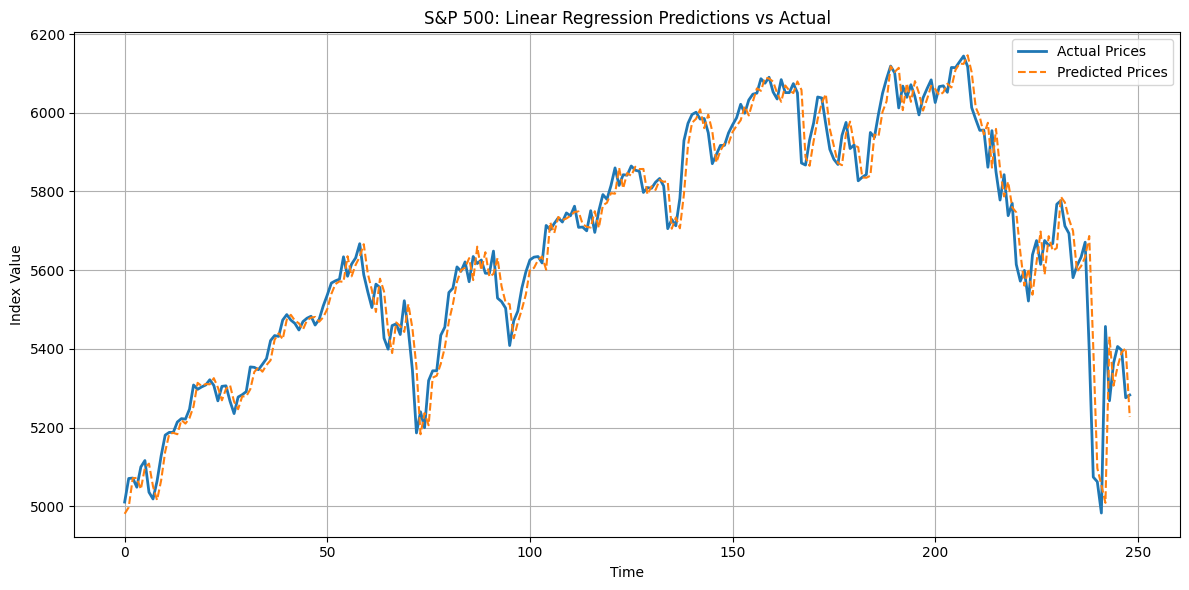

Linear Regression Metrics (Dow Jones):
RMSE: 423.8189
MAE:  284.3354
R² Score: 0.9558


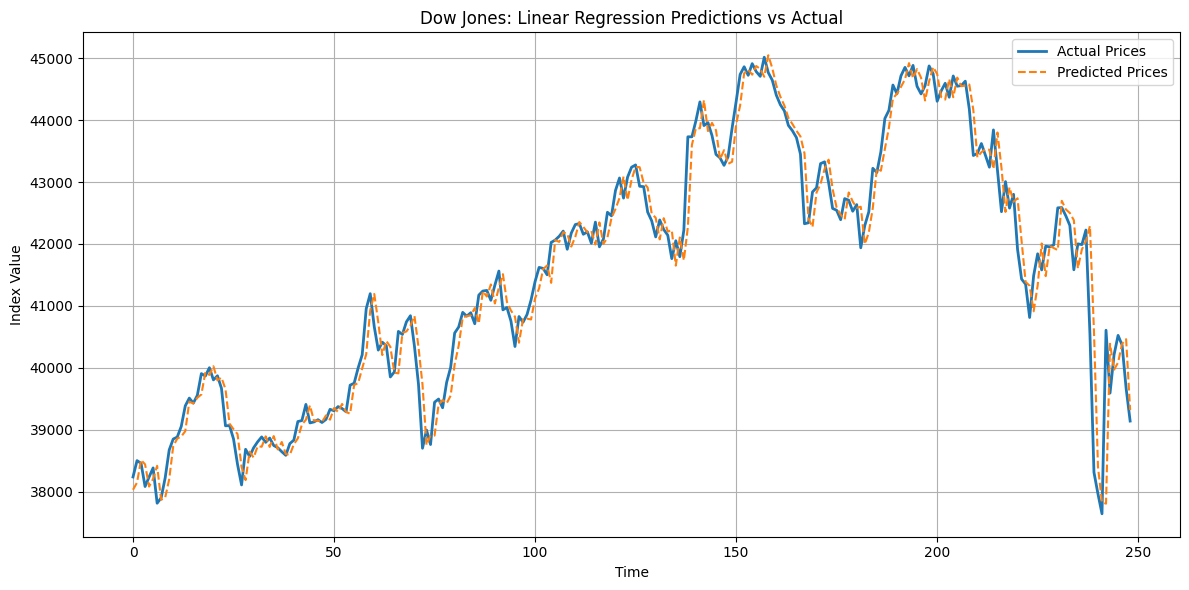

Linear Regression Metrics (NASDAQ):
RMSE: 277.1643
MAE:  194.2939
R² Score: 0.9453


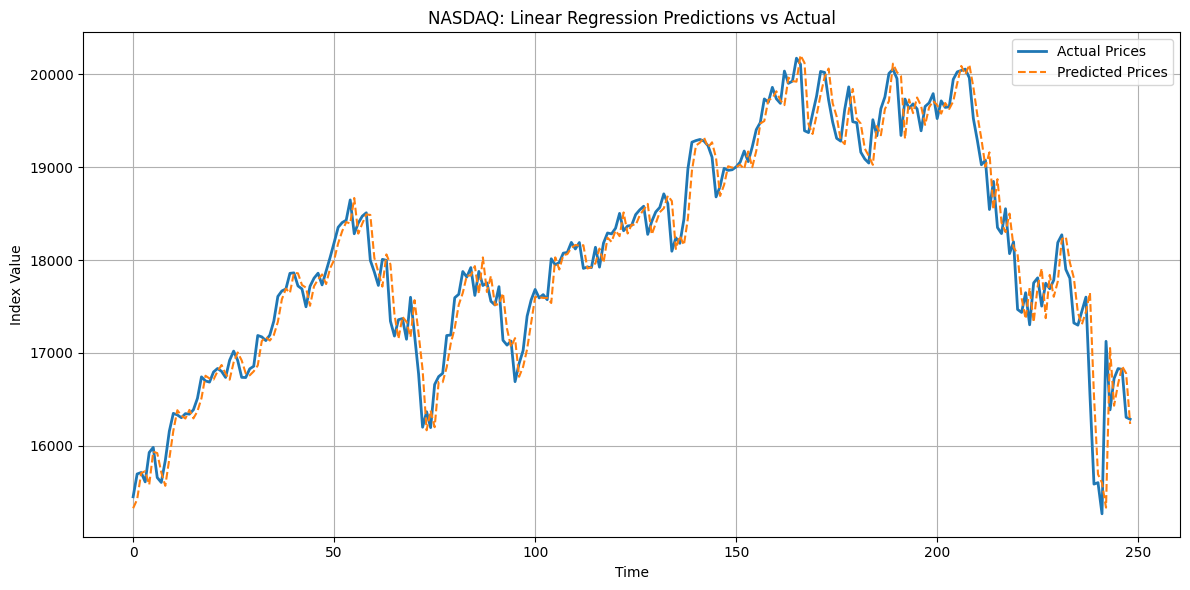

In [12]:

_, lr_pred_spy, y_test_spy_actual, lr_metrics_spy = LR(X_train_spy, X_test_spy, y_train_spy, y_test_spy, scaler_spy, label="S&P 500")
plot_predictions(y_test_spy_actual, lr_pred_spy, title="S&P 500: Linear Regression Predictions vs Actual")

_, lr_pred_dow, y_test_dow_actual, lr_metrics_dow = LR(X_train_dow, X_test_dow, y_train_dow, y_test_dow, scaler_dow, label="Dow Jones")
plot_predictions(y_test_dow_actual, lr_pred_dow, title="Dow Jones: Linear Regression Predictions vs Actual")

_, lr_pred_nasdaq, y_test_nasdaq_actual, lr_metrics_nasdaq = LR(X_train_nasdaq, X_test_nasdaq, y_train_nasdaq, y_test_nasdaq, scaler_nasdaq, label="NASDAQ")
plot_predictions(y_test_nasdaq_actual, lr_pred_nasdaq, title="NASDAQ: Linear Regression Predictions vs Actual")



In [13]:
# S&P 500
_, xgb_pred_spy, y_test_spy_actual, xgb_metrics_spy = xgboost(X_train_spy, X_test_spy, y_train_spy, y_test_spy, scaler_spy, label='S&P 500')
plot_predictions(y_test_spy_actual, xgb_pred_spy, title='S&P 500 - XGBoost Predictions vs Actual')

# Dow Jones
_, xgb_pred_dow, y_test_dow_actual, xgb_metrics_dow = xgboost(X_train_dow, X_test_dow, y_train_dow, y_test_dow, scaler_dow, label='Dow Jones')
plot_predictions(y_test_dow_actual, xgb_pred_dow, title='Dow Jones - XGBoost Predictions vs Actual')

# NASDAQ
_, xgb_pred_nasdaq, y_test_nasdaq_actual, xgb_metrics_nasdaq = xgboost(X_train_nasdaq, X_test_nasdaq, y_train_nasdaq, y_test_nasdaq, scaler_nasdaq, label='NASDAQ')
plot_predictions(y_test_nasdaq_actual, xgb_pred_nasdaq, title='NASDAQ - XGBoost Predictions vs Actual')


NameError: name 'XGBRegressor' is not defined

Random Forest Metrics (S&P 500):
RMSE: 562.6260
MAE:  487.9408
R² Score: -2.6403


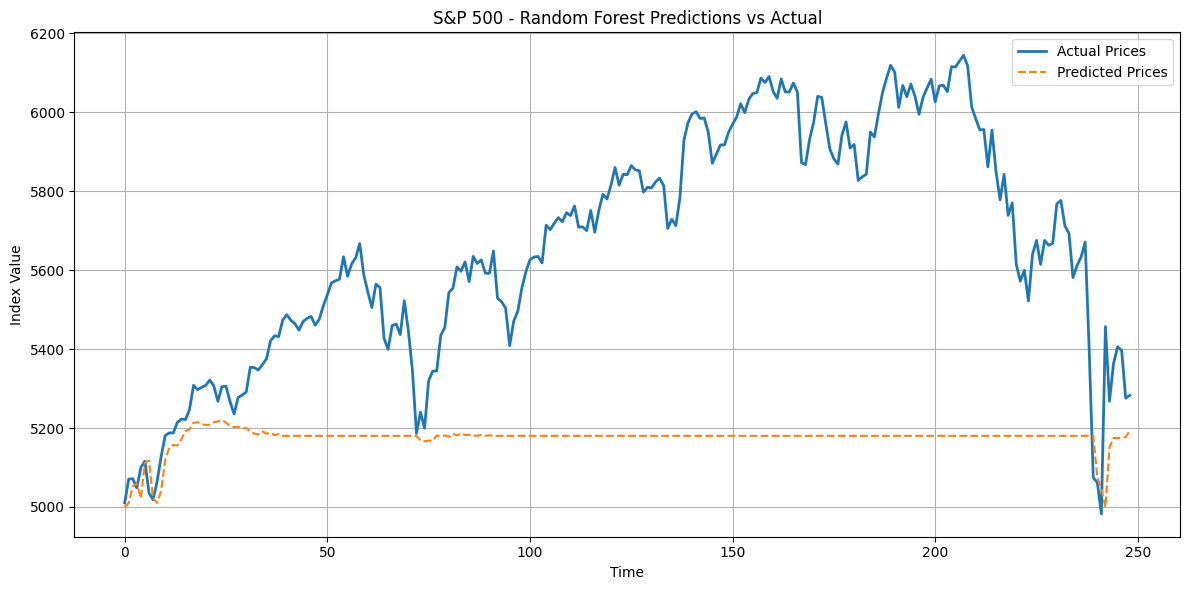

Random Forest Metrics (Dow Jones):
RMSE: 2864.7475
MAE:  2293.2519
R² Score: -1.0189


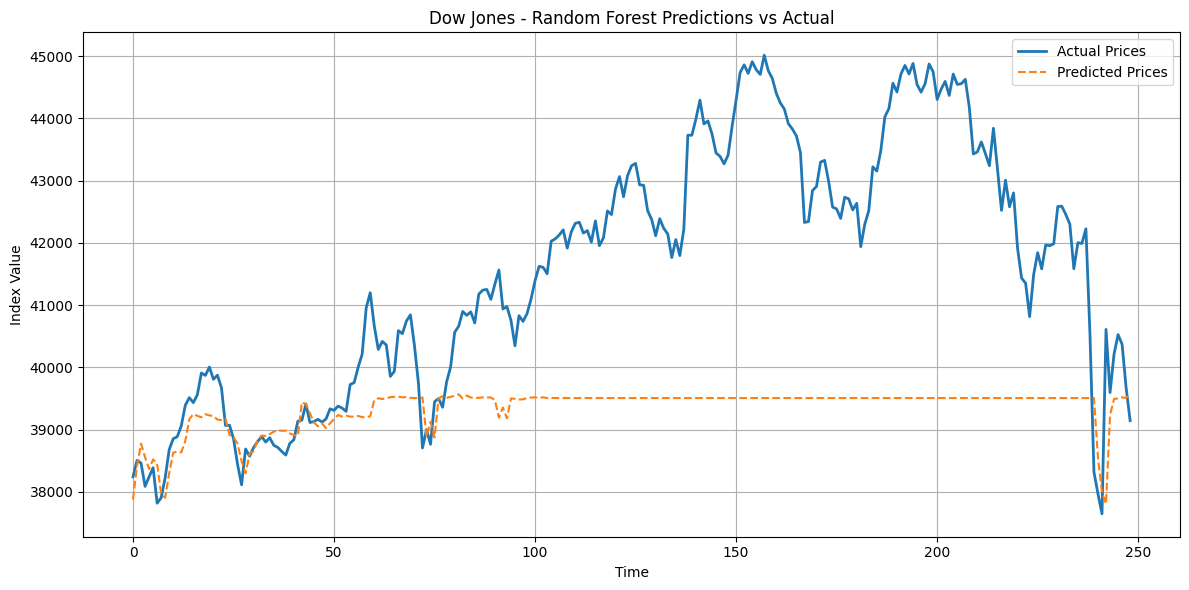

Random Forest Metrics (NASDAQ):
RMSE: 2274.8324
MAE:  1975.1167
R² Score: -2.6878


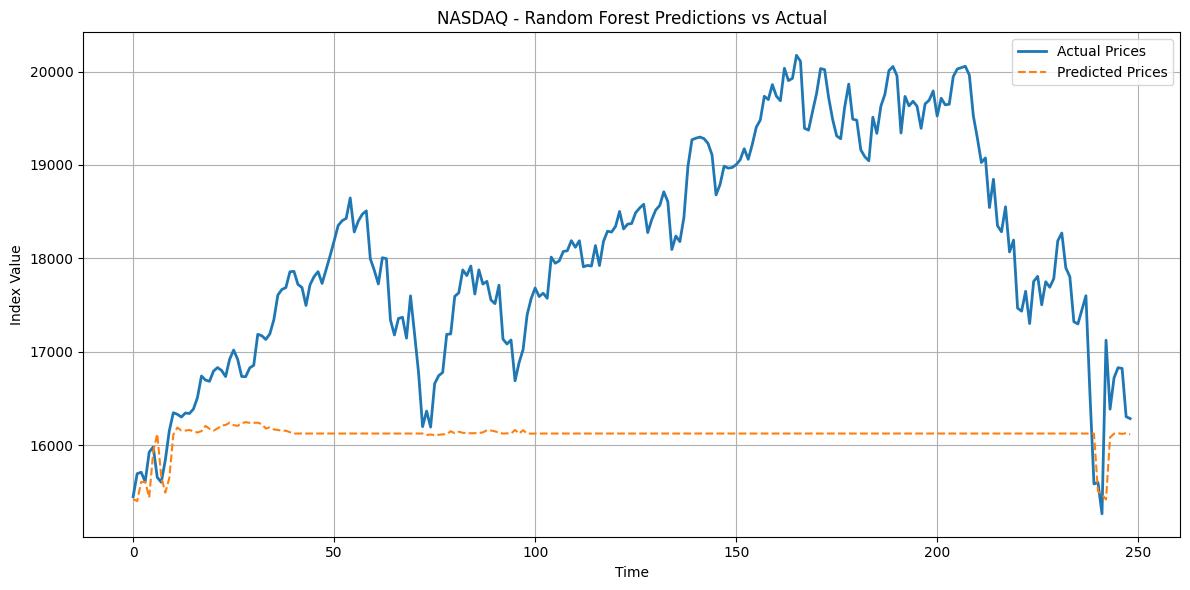

In [15]:
# S&P 500
_, rf_pred_spy, y_test_spy_actual, rf_metrics_spy = RF(X_train_spy, X_test_spy, y_train_spy, y_test_spy, scaler_spy, label='S&P 500')
plot_predictions(y_test_spy_actual, rf_pred_spy, title='S&P 500 - Random Forest Predictions vs Actual')

# Dow Jones
_, rf_pred_dow, y_test_dow_actual, rf_metrics_dow = RF(X_train_dow, X_test_dow, y_train_dow, y_test_dow, scaler_dow, label='Dow Jones')
plot_predictions(y_test_dow_actual, rf_pred_dow, title='Dow Jones - Random Forest Predictions vs Actual')

# NASDAQ
_, rf_pred_nasdaq, y_test_nasdaq_actual, rf_metrics_nasdaq = RF(X_train_nasdaq, X_test_nasdaq, y_train_nasdaq, y_test_nasdaq, scaler_nasdaq, label='NASDAQ')
plot_predictions(y_test_nasdaq_actual, rf_pred_nasdaq, title='NASDAQ - Random Forest Predictions vs Actual')


In [19]:
def plot_full_with_predictions(full_data, column, y_test_actual, y_pred, title='Index Forecast (10-Year Overview)', test_size=0.1):
    import matplotlib.pyplot as plt
    import numpy as np

    full_series = full_data[column].values
    total_len = len(full_series)
    test_len = len(y_test_actual)
    train_len = total_len - test_len

    # Create timeline for plotting
    timeline = full_data.index
    full_range = np.arange(total_len)
    test_range = np.arange(train_len, total_len)

    plt.figure(figsize=(14, 6))
    plt.plot(timeline, full_series, label='Full Historical Data', linewidth=2)
    plt.plot(timeline[test_range], y_test_actual.flatten(), label='Actual Test Data', color='green', linewidth=2)
    plt.plot(timeline[test_range], y_pred.flatten(), label='Predicted Data', linestyle='--', color='red', linewidth=2)

    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Index Value")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


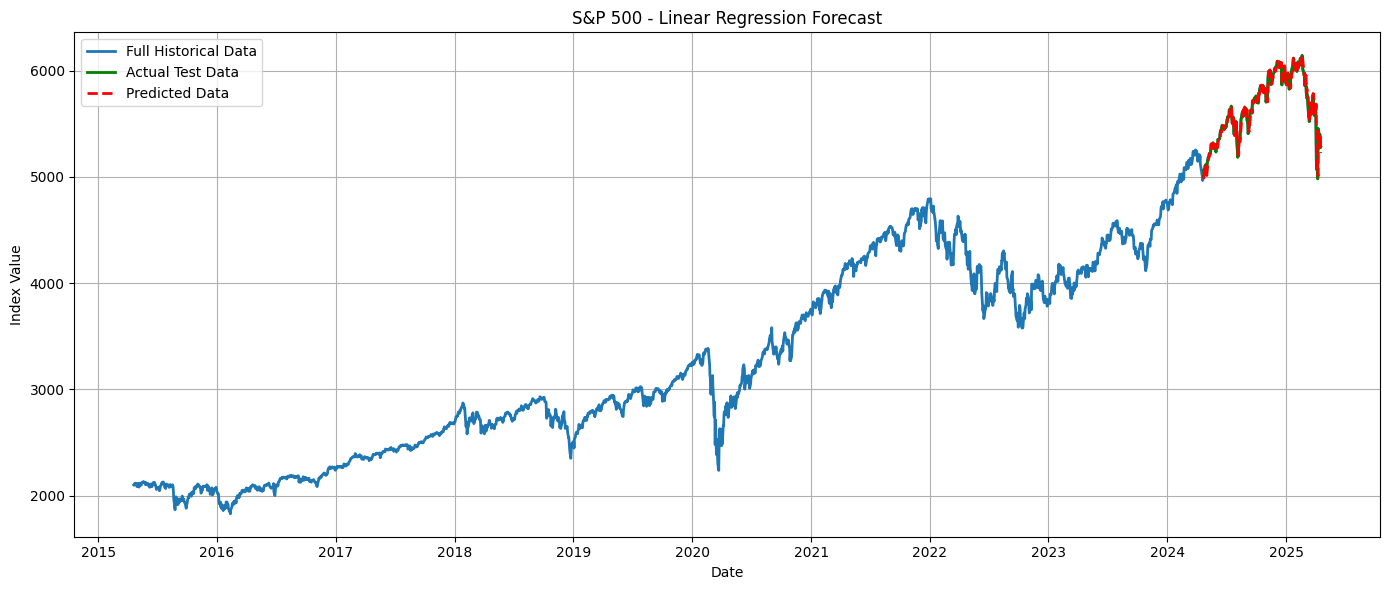

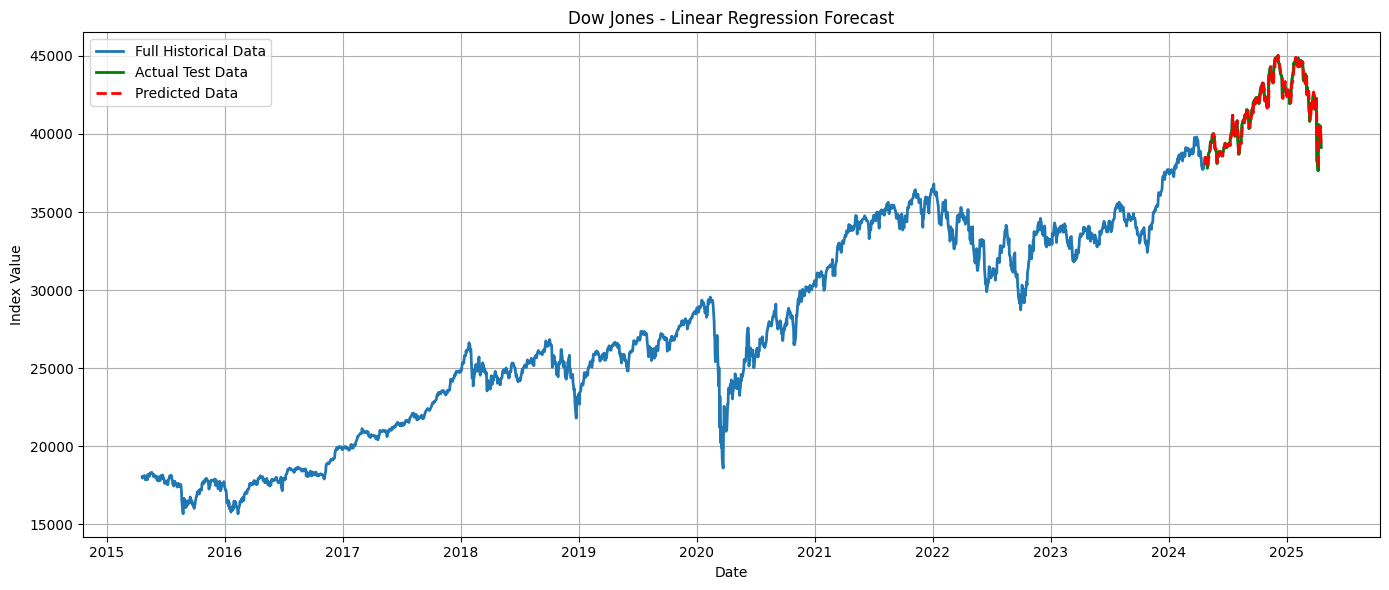

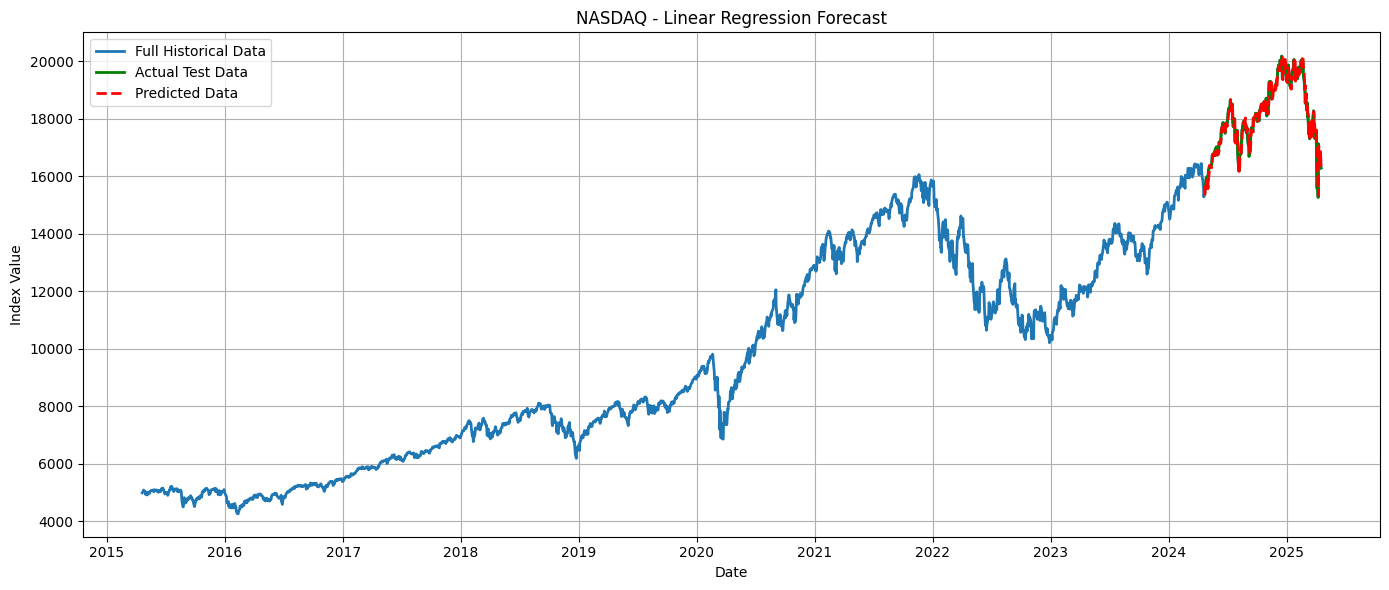

In [21]:
plot_full_with_predictions(SPY_data, 'Close', y_test_spy_actual, lr_pred_spy, title='S&P 500 - Linear Regression Forecast')

plot_full_with_predictions(dow_data, 'Close', y_test_dow_actual, lr_pred_dow, title='Dow Jones - Linear Regression Forecast')

plot_full_with_predictions(nasdaq_data, 'Close', y_test_nasdaq_actual, lr_pred_nasdaq, title='NASDAQ - Linear Regression Forecast')


In [22]:
plot_full_with_predictions(SPY_data, 'Close', y_test_spy_actual, xgb_pred_spy, title='S&P 500 - XGBoost Forecast')

plot_full_with_predictions(dow_data, 'Close', y_test_dow_actual, xgb_pred_dow, title='Dow Jones - XGBoost Forecast')

plot_full_with_predictions(nasdaq_data, 'Close', y_test_nasdaq_actual, xgb_pred_nasdaq, title='NASDAQ - XGBoost Forecast')


NameError: name 'xgb_pred_spy' is not defined

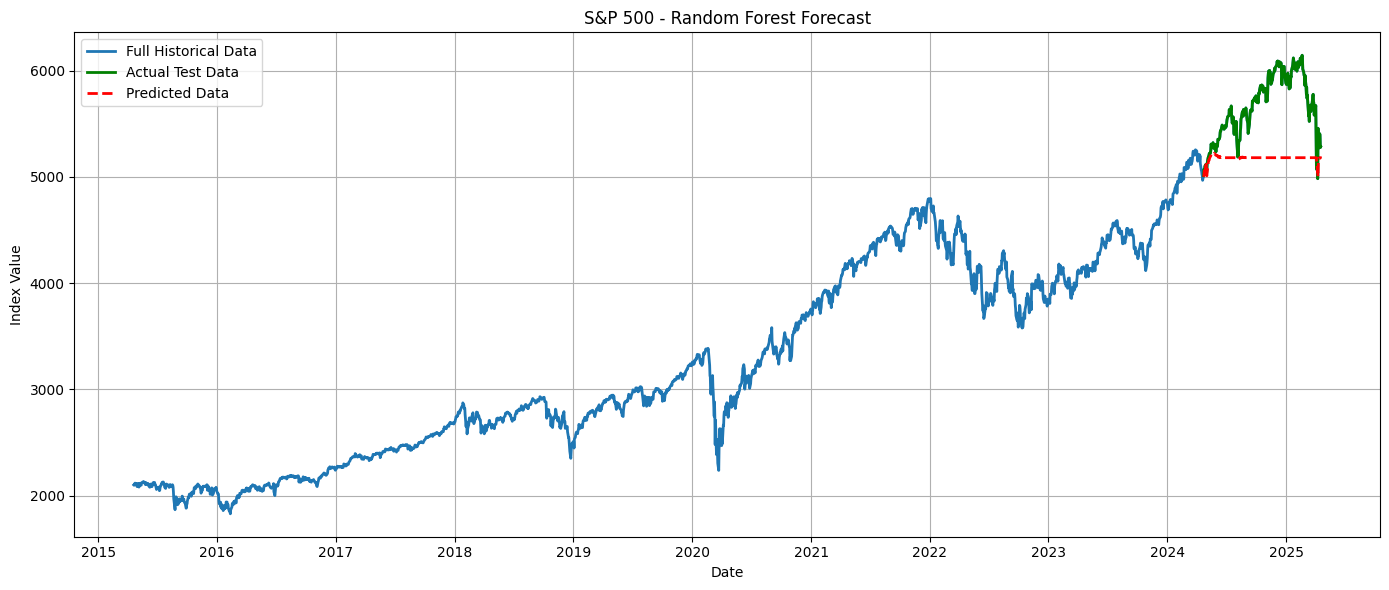

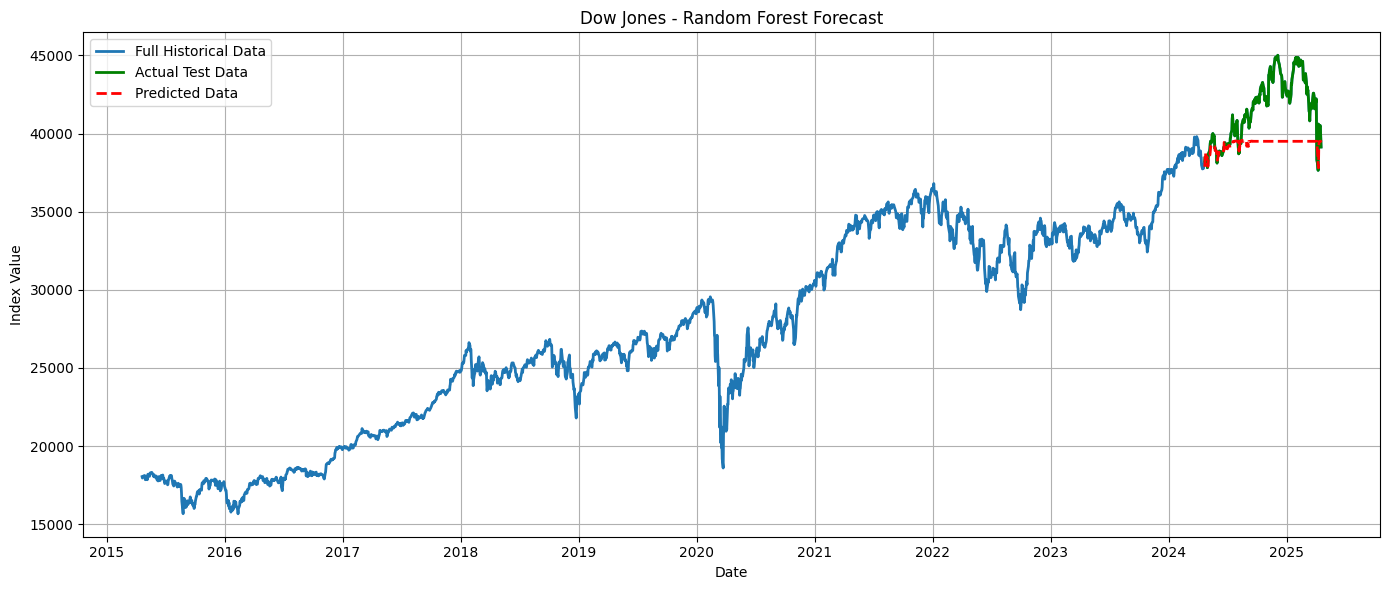

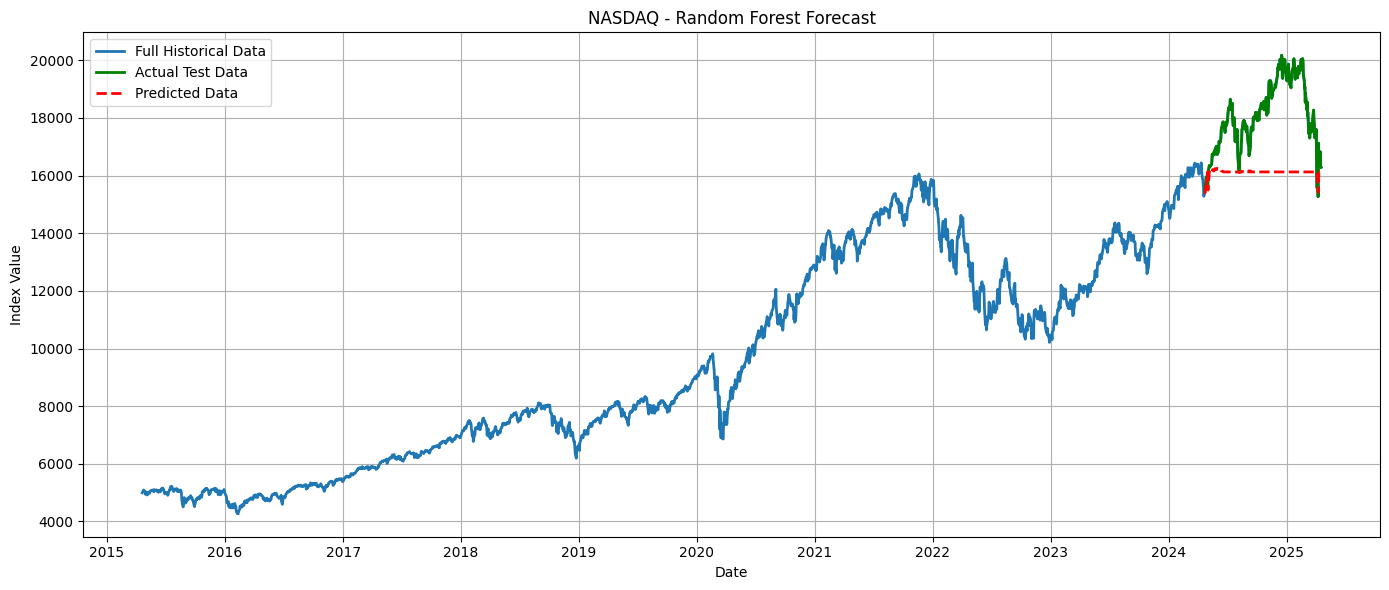

In [23]:
plot_full_with_predictions(SPY_data, 'Close', y_test_spy_actual, rf_pred_spy, title='S&P 500 - Random Forest Forecast')

plot_full_with_predictions(dow_data, 'Close', y_test_dow_actual, rf_pred_dow, title='Dow Jones - Random Forest Forecast')

plot_full_with_predictions(nasdaq_data, 'Close', y_test_nasdaq_actual, rf_pred_nasdaq, title='NASDAQ - Random Forest Forecast')


In [26]:
metrics_df = pd.DataFrame({
    'S&P 500': {
        'LR_RMSE': lr_metrics_spy['rmse'],
        'LR_MAE': lr_metrics_spy['mae'],
        'LR_R2': lr_metrics_spy['r2'],
        'XGB_RMSE': xgb_metrics_spy['rmse'],
        'XGB_MAE': xgb_metrics_spy['mae'],
        'XGB_R2': xgb_metrics_spy['r2'],
        'RF_RMSE': rf_metrics_spy['rmse'],
        'RF_MAE': rf_metrics_spy['mae'],
        'RF_R2': rf_metrics_spy['r2'],
    },
    'Dow Jones': {
        'LR_RMSE': lr_metrics_dow['rmse'],
        'LR_MAE': lr_metrics_dow['mae'],
        'LR_R2': lr_metrics_dow['r2'],
        'XGB_RMSE': xgb_metrics_dow['rmse'],
        'XGB_MAE': xgb_metrics_dow['mae'],
        'XGB_R2': xgb_metrics_dow['r2'],
        'RF_RMSE': rf_metrics_dow['rmse'],
        'RF_MAE': rf_metrics_dow['mae'],
        'RF_R2': rf_metrics_dow['r2'],
    },
    'NASDAQ': {
        'LR_RMSE': lr_metrics_nasdaq['rmse'],
        'LR_MAE': lr_metrics_nasdaq['mae'],
        'LR_R2': lr_metrics_nasdaq['r2'],
        'XGB_RMSE': xgb_metrics_nasdaq['rmse'],
        'XGB_MAE': xgb_metrics_nasdaq['mae'],
        'XGB_R2': xgb_metrics_nasdaq['r2'],
        'RF_RMSE': rf_metrics_nasdaq['rmse'],
        'RF_MAE': rf_metrics_nasdaq['mae'],
        'RF_R2': rf_metrics_nasdaq['r2'],
    }
}).T  # Transpose to make indexes the rows

metrics_df = metrics_df.round(4)


NameError: name 'lr_metrics_spy' is not defined

In [ ]:
print(metrics_df)


In [27]:
metrics_df.style.set_caption("Model Performance Comparison Across Indexes")


NameError: name 'metrics_df' is not defined